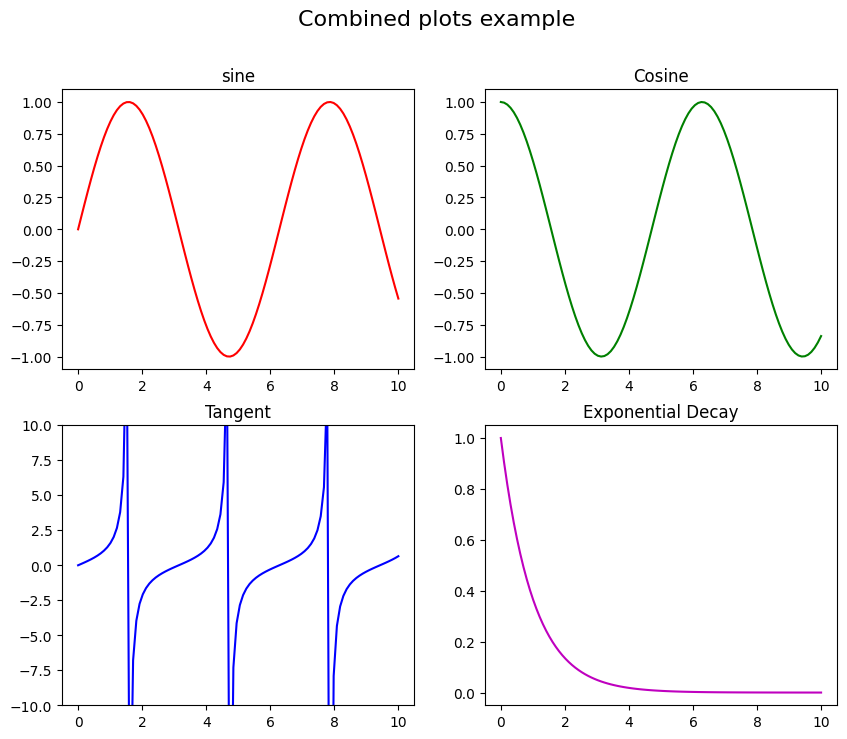

In [2]:
# Combining Plots with Matplotlib
# Objective: Combine multiple plots into a single figure using Matplotlib's subplots.

import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0,10,100)
y1=np.sin(x)
y2=np.cos(x)
y3=np.tan(x)
y4=np.exp(-x)

fig,axs=plt.subplots(2,2,figsize=(10,8))
axs[0,0].plot(x,y1,'r')
axs[0,0].set_title('sine')

axs[0,1].plot(x,y2,'g')
axs[0,1].set_title('Cosine')

axs[1,0].plot(x,y3,'b')
axs[1,0].set_ylim(-10,10)
axs[1,0].set_title('Tangent')

axs[1,1].plot(x,y4,'m')
axs[1,1].set_title('Exponential Decay')

fig.suptitle('Combined plots example',fontsize=16)
plt.show()